# Audio Data Introduction

This tutorial will go over a brief introduction to audio data and how it can be processed using Python, including basic terminology and needed libraries.  

Here we use one data point from this dataset as an example: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio

### Definitions: 

Amplitude: 
* The intensity of a signal at a given time.
* Higher amplitude = louder sound

Period: 
* The distance between two adjacent peaks or two adjacent troughs.
* Period is generally represented by the letter T, and the units for this is time (seconds).

Frequency: 
* Frequency is 1/T.
* The higher the frequency, the higher the pitch of the sound.
* The units for this is in Hertz (Hz).

Samples: 
* The samples are the set of amplitude points of an audio signal.

Sample rate: 
* The number of samples taken per second.
* The unit we use for sample rate throughout this demo is Hertz (Hz).
* The higher the sampling rate, the higher the resolution of the sound.
* We need a sampling rate to convert a continuous wave into discretized points while saving it digitally.

Duration: 
* The time for which a given sound lasts.
* You can find the duration in seconds by dividing the number of samples by the sample rate (Hz).

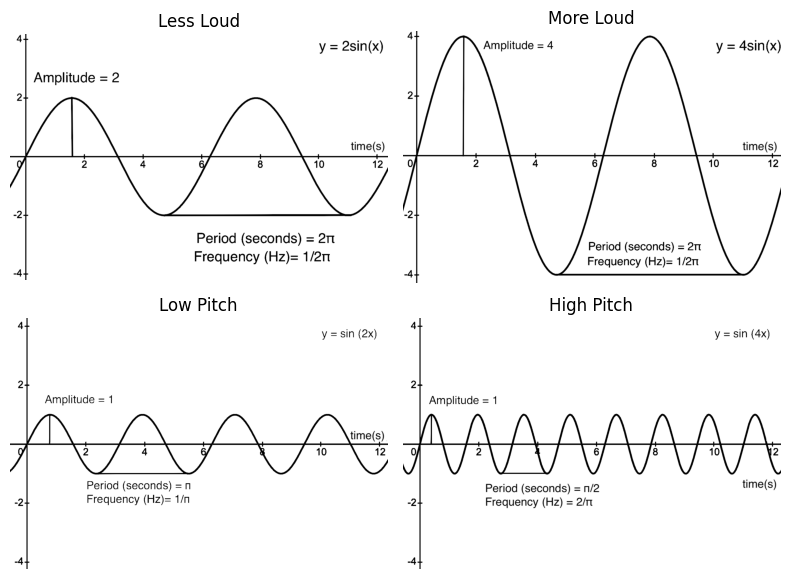

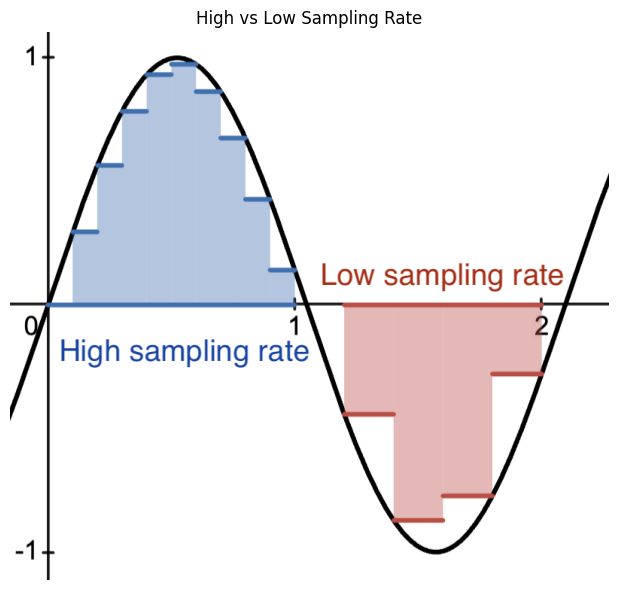

In [1]:
# visualize the amplitude and frequency:
import matplotlib.image as img
import matplotlib.pyplot as plt

img1 = img.imread('images/2sinx.png') 
img2 = img.imread('images/4sinx.png')
img3 = img.imread('images/sin2x.png')
img4 = img.imread('images/sin4x.png')

fig, ax = plt.subplots(2, 2, figsize=(8, 6)) 

ax[0,0].imshow(img1)
ax[0,0].set_title('Less Loud') 
ax[0,0].axis('off') 

ax[0,1].imshow(img2)
ax[0,1].set_title('More Loud') 
ax[0,1].axis('off') 

ax[1,0].imshow(img3)
ax[1,0].set_title('Low Pitch') 
ax[1,0].axis('off') 

ax[1,1].imshow(img4)
ax[1,1].set_title('High Pitch') 
ax[1,1].axis('off') 

fig.tight_layout()
plt.show()

fig2, (ax) = plt.subplots(1,1,figsize=(8,6))
ax.imshow(img.imread('images/sample_rate.png') )
ax.set_title('High vs Low Sampling Rate') 
ax.axis('off')

fig2.tight_layout()
plt.show()

### Code Demo

In [10]:
import librosa # used for processing audio data
import librosa.display
import matplotlib.pyplot as plt # used for plotting graphs
import matplotlib.image as img
import numpy as np # used for processing audio data; all audio samples are converted to this form.
from IPython.display import Audio, Image, display # used to display audio/image files on Jupyter Notebooks
from pydub import AudioSegment # for processing audio data

In [3]:
# set the relative path of the audio file to graph
AUDIO_FILE = "../data/raw/Actor_01/03-01-01-01-01-01-01.wav"  

In [4]:

def load_play_audio(AUDIO_FILE, sample_rate=None):
    '''
    This function prints the number of samples, sample rate and duration of a given audio file

    INPUTS:
    AUDIO_FILE: relative path to an audio file (must be .wav).  Must be of type String
    sample_rate: integer specifying the rate at which the load should be sampled.  Blank value defaults to the original sample rate of the file

    OUTPUTS:
    samples: The list of normalized amplitude values in range [-1, 1]. Numpy array of float32 values
    sample_rate: Number of samples taken per second. The type is int
    duration: The time it takes to play the given audio file in seconds.  The type is float
    '''
    
    # load all amplitude points and the sampling rate of the audio
    samples, sample_rate = librosa.load(AUDIO_FILE, sr=sample_rate)
    duration = AudioSegment.from_file(AUDIO_FILE).duration_seconds
    
    # sample points are in a numpy array of float32 values; range of values is [-1, 1]
    # sample rate is an integer; this number represents the samples per second (Hz).
    
    # print the details
    print(f"Number of samples: {samples.shape[0]}") 
    print(f"Sample rate: {sample_rate} Hz") 
    print(f"Duration: {duration} seconds")

    return samples, sample_rate, duration

In [1]:
# get the original sampling rate
samples, sample_rate, _ = load_play_audio(AUDIO_FILE)

# play the audio file
Audio(data=samples, rate=sample_rate)

NameError: name 'load_play_audio' is not defined

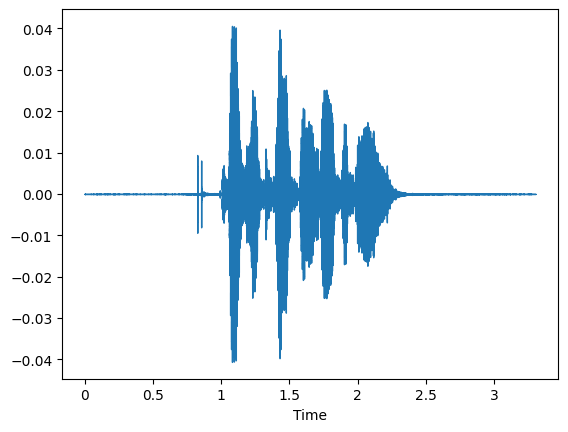

In [6]:
librosa.display.waveshow(samples, sr=sample_rate)

In [7]:
# try a much lower sampling rate
samples, sample_rate, _ = load_play_audio(AUDIO_FILE, 4000)

# play the audio file
Audio(data=samples, rate=sample_rate)

Number of samples: 13214
Sample rate: 4000 Hz
Duration: 3.3032916666666665 seconds


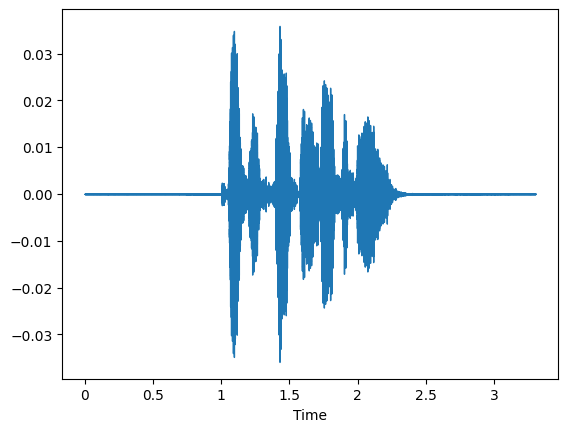

In [8]:
librosa.display.waveshow(samples, sr=sample_rate)

We can also find the duration from using the number of samples and sample rate:

$ Duration = \frac{158558}{48000} \frac{samples}{\frac{samples}{second}} \approx{3.303} $ $seconds$

This will work when running the function with any sample rate.

Overall, from the above examples, we can see how the quality of the audio degrades as the sampling rate gets lower.  Specifically, we can notice that the pitch of the audio has gone low.

## Below is the audio visualized as a Mel-frequency Spectrogram.

Number of samples: 158558
Sample rate: 48000 Hz
Duration: 3.3032916666666665 seconds


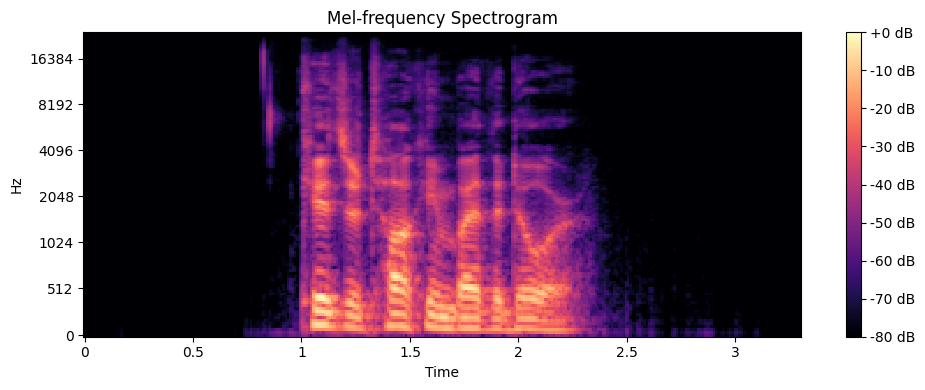

In [11]:
# Here, the y axis represents the frequency, x axis represents the time in seconds and the brighter colors represent higher volume.
# In a Mel Spectrogram, the frequencies are graphed based on the Mel scale, which is the perceived audio pitch by humans.

y, sr, _ = load_play_audio(AUDIO_FILE)
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency Spectrogram')
plt.tight_layout()
plt.show()